In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [196]:
#splitting data in train and test sets
from sklearn.model_selection import train_test_split
#applying model
from sklearn.neighbors import KNeighborsClassifier
#Parameter Tuning
from sklearn.model_selection import cross_val_score
#Checking accuracy
from sklearn.metrics import accuracy_score


## Importing banking.csv dataset

In [197]:
path = 'https://raw.githubusercontent.com/rohitgupta29/Datasets/master/Market/banking.csv'
bank = pd.read_csv(path)

In [198]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [199]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [200]:
bank['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [201]:
bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Taking only numeric inputs

In [202]:
bank_num = bank[['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
bank_num

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5


In [203]:
X = bank_num
y = bank['y']

X.shape, y.shape

((41188, 10), (41188,))

## Splitting the data

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32950, 10), (8238, 10), (32950,), (8238,))

## Applying Model

In [205]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X,y)
y_predict = knn.predict(X_test)
y_predict.shape

(8238,)

### Accuracy of the model

In [206]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy score : ', accuracy)

Accuracy score :  0.9386987132799223


In [207]:
neighbors = list(range(1,50,2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_scaled,y,cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())


In [208]:
cv_scores

[0.8881227802643101,
 0.8995096345121654,
 0.9040498425838116,
 0.9056278837182458,
 0.906356145091493,
 0.9069145861093846,
 0.907521612079489,
 0.9080801120525466,
 0.9089298210675342,
 0.90871133911825,
 0.9096581944555968,
 0.9106293275302585,
 0.9102894451033666,
 0.9100709100944332,
 0.9106536229541232,
 0.9105322047899657,
 0.9107992422138798,
 0.9107992304228466,
 0.9108234786825784,
 0.9107264031064185,
 0.9111633964825698,
 0.9107021017870371,
 0.9103864558288443,
 0.9100222779780877,
 0.9099008775004801]

In [209]:
MSE = [1 - x for x in cv_scores]
MSE

[0.11187721973568987,
 0.10049036548783463,
 0.0959501574161884,
 0.09437211628175424,
 0.09364385490850702,
 0.09308541389061542,
 0.092478387920511,
 0.09191988794745343,
 0.09107017893246583,
 0.09128866088175003,
 0.09034180554440319,
 0.08937067246974151,
 0.08971055489663338,
 0.0899290899055668,
 0.08934637704587678,
 0.08946779521003434,
 0.08920075778612024,
 0.0892007695771534,
 0.0891765213174216,
 0.0892735968935815,
 0.08883660351743017,
 0.08929789821296286,
 0.08961354417115575,
 0.08997772202191234,
 0.0900991224995199]

In [210]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k is : ', optimal_k)

The optimal number of k is :  41


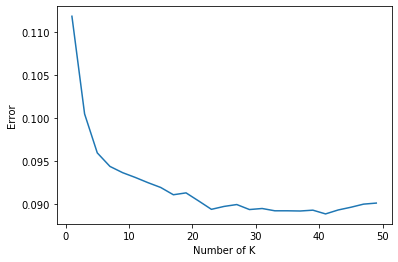

In [211]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()

### Scaling Data

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38152696, -0.18623008, -0.56592197, ...,  0.95126739,
         0.77357519,  0.84517009],
       [ 1.24515746, -0.46392633, -0.56592197, ..., -0.32354233,
         0.23045613,  0.39811529],
       [-1.15381613,  0.31130902,  0.15610492, ...,  0.15181045,
        -1.66757776, -2.42815683],
       ...,
       [ 0.18960908, -0.75705015,  0.15610492, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 0.76536274, -0.22479901, -0.20490853, ...,  2.93910628,
        -1.66008249, -2.06968255],
       [-1.44169297, -0.56420553,  0.51711837, ...,  0.88644656,
         0.713613  ,  0.33167991]])

### training Scaled Data

In [213]:
X_trains,X_tests,y_trains,y_tests = train_test_split(X_scaled,y,test_size = 0.2)

X_trains.shape,X_tests.shape,y_trains.shape,y_tests.shape

((32950, 10), (8238, 10), (32950,), (8238,))

In [214]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_scaled,y)
y_predicts = knn.predict(X_tests)
y_predicts.shape , X_scaled.shape 

((8238,), (41188, 10))

In [215]:
accuracy = accuracy_score(y_test, y_predicts)
print('Accuracy score : ', accuracy)

Accuracy score :  0.8088128186453023


In [216]:
neighbors = list(range(1,50,2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_scaled,y,cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

### Cross Validation for best value of K

In [217]:
cv_scores

[0.8881227802643101,
 0.8995096345121654,
 0.9040498425838116,
 0.9056278837182458,
 0.906356145091493,
 0.9069145861093846,
 0.907521612079489,
 0.9080801120525466,
 0.9089298210675342,
 0.90871133911825,
 0.9096581944555968,
 0.9106293275302585,
 0.9102894451033666,
 0.9100709100944332,
 0.9106536229541232,
 0.9105322047899657,
 0.9107992422138798,
 0.9107992304228466,
 0.9108234786825784,
 0.9107264031064185,
 0.9111633964825698,
 0.9107021017870371,
 0.9103864558288443,
 0.9100222779780877,
 0.9099008775004801]

In [218]:
MSE = [1 - x for x in cv_scores]
MSE

[0.11187721973568987,
 0.10049036548783463,
 0.0959501574161884,
 0.09437211628175424,
 0.09364385490850702,
 0.09308541389061542,
 0.092478387920511,
 0.09191988794745343,
 0.09107017893246583,
 0.09128866088175003,
 0.09034180554440319,
 0.08937067246974151,
 0.08971055489663338,
 0.0899290899055668,
 0.08934637704587678,
 0.08946779521003434,
 0.08920075778612024,
 0.0892007695771534,
 0.0891765213174216,
 0.0892735968935815,
 0.08883660351743017,
 0.08929789821296286,
 0.08961354417115575,
 0.08997772202191234,
 0.0900991224995199]

In [219]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k is : ', optimal_k)

The optimal number of k is :  41


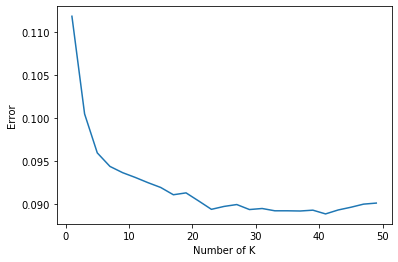

In [220]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()